In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
import logging

pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

float_formatter = "{:.5f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

In [3]:
lv = LV.from_file(filepath, geo_type=LV_GEO_TYPES.IDEAL, log_level=logging.DEBUG)
lv.identify_regions(log_level=logging.DEBUG)

lv.plot("surface", 
        scalars=LV_MESH_DATA.SURFS_DETAILED,
        # container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        cmap="jet",
        vnodes=[[lv.VIRTUAL_NODES.BASE, {"color":"red"}], [lv.VIRTUAL_NODES.APEX, {"color":"green"}] ]
        )

INFO:LV_RegionIdentifier.identify_regions_ideal:Identifying regions from ideal geometry.
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:Starting identification of base and apex regions.
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:Perfoming kmeans to find LV halves
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:kcenters: [[0.00002 -0.00000 -48.78886]
 [0.00000 -0.00000 0.32648]]
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:Estimating apex and base iteractively.
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:apex: [0.00000 0.00000 -72.69446]
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:base: [0.00000 0.00000 17.77086]
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:len(est_apex_region): 649
DEBUG:LV_RegionIdentifier.identify_base_and_apex_regions:len(est_base_region): 1632
DEBUG:LV_RegionIdentifier.identify_epi_endo_regions:Starting identification of endo and epi regions for ideal geometry.
DEBUG:LV_RegionIdentif

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…

In [4]:
_ = lv.create_speckles(
        collection="LA", # longitudinal axis collection
        group="endo",     # at endocardium
        name="base",    # base region
        from_nodeset=LV_SURFS.BASE_BORDER_ENDO, # using border (edge for ideal)
        use_all_nodes=True, # skip search for nodes close to 'plane'
        log_level=logging.DEBUG,
    )
_ = lv.create_speckles(
        collection="LA", # longitudinal axis collection
        group="epi",     # at epicardium
        name="base",    # base region
        from_nodeset=LV_SURFS.BASE_BORDER_EPI, # using border (edge for ideal)
        use_all_nodes=True, # skip search for nodes close to 'plane'
        log_level=logging.DEBUG,
    )

_ = lv.create_speckles(
        collection="LA", # longitudinal axis collection
        group="endo",     # at endocardium
        name="apex",    # base region
        from_nodeset=LV_SURFS.ENDO, # using border (edge for ideal)
        k=0.0,
        d=1.0,
        log_level=logging.DEBUG,
    )
_ = lv.create_speckles(
        collection="LA", # longitudinal axis collection
        group="epi",     # at epicardium
        name="apex",    # base region
        from_nodeset=LV_SURFS.EPI, # using border (edge for ideal)
        use_local_k_ref=True,
        k=0.0,
        d=1.0,
        log_level=logging.DEBUG,
    )


spks = lv.get_speckles(spk_collection="LA")
lv.plot_speckles(spks)

INFO:create_speckles:Speckle: name: base, group: endo, collection: LA
DEBUG:create_speckles:Using nodes from nodeset LV_SURFS.BASE_BORDER_ENDO
DEBUG:create_speckles:long_line: 
[[-0.00000 0.00001 -65.12163]
 [0.00000 0.00000 20.00000]]
DEBUG:create_speckles:ref p (spk center): [0.00000 0.00000 20.00000]
DEBUG:create_speckles:Using all nodes in mesh OR nodeset (not computing plane).
DEBUG:create_speckles:Adding single subset.
INFO:create_speckles:Speckle: name: base, group: epi, collection: LA
DEBUG:create_speckles:Using nodes from nodeset LV_SURFS.BASE_BORDER_EPI
DEBUG:create_speckles:long_line: 
[[-0.00000 0.00001 -65.12163]
 [0.00000 0.00000 20.00000]]
DEBUG:create_speckles:ref p (spk center): [0.00000 0.00000 20.00000]
DEBUG:create_speckles:Using all nodes in mesh OR nodeset (not computing plane).
DEBUG:create_speckles:Adding single subset.
INFO:create_speckles:Speckle: name: apex, group: endo, collection: LA
DEBUG:create_speckles:Using nodes from nodeset LV_SURFS.ENDO
DEBUG:create_

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…

In [5]:
apex_spk = lv.get_speckles(spk_collection="LA", spk_group="endo", spk_name="apex")
base_spk = lv.get_speckles(spk_collection="LA", spk_group="endo", spk_name="base")

lv.compute_base_apex_ref_over_timesteps(apex_spk, base_spk)

INFO:LV.BaseMetricsComputations.compute_base_apex_ref_over_timesteps:Computing apex and base virtual nodes over timesteps


([array([0.00000, 0.00000, 20.00000]),
  array([0.05086, 0.07952, 20.00000]),
  array([0.23185, 0.12848, 20.00000]),
  array([0.30669, 0.22607, 20.00000]),
  array([0.24527, 0.15415, 20.00000]),
  array([0.24519, 0.15319, 20.00000]),
  array([0.24530, 0.15121, 20.00000]),
  array([0.24548, 0.14869, 20.00000]),
  array([0.24581, 0.14617, 20.00000]),
  array([0.24622, 0.14344, 20.00000]),
  array([0.24677, 0.14079, 20.00000]),
  array([0.24741, 0.13795, 20.00000]),
  array([0.24817, 0.13579, 20.00000]),
  array([0.24904, 0.13347, 20.00000]),
  array([0.25001, 0.13129, 20.00000]),
  array([0.25111, 0.12885, 20.00000]),
  array([0.25230, 0.12656, 20.00000]),
  array([0.25366, 0.12400, 20.00000]),
  array([0.25508, 0.12156, 20.00000]),
  array([0.25669, 0.11884, 20.00000]),
  array([0.25835, 0.11674, 20.00000]),
  array([0.26024, 0.11417, 20.00000]),
  array([0.26214, 0.11145, 20.00000]),
  array([0.26432, 0.10792, 20.00000]),
  array([0.26648, 0.10445, 20.00000]),
  array([0.26897, 0.10073

In [6]:
apex_spks = lv.get_speckles(spk_collection="LA", spk_name="apex")
base_spks = lv.get_speckles(spk_collection="LA", spk_name="base")

lv.compute_longitudinal_distance(apex_spks, base_spks)

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONGITUDINAL_DISTANCE'.
INFO:LV.BaseMetricsComputations:Computing 'LV_STATES.LONGITUDINAL_DISTANCE' with approach 'centroid' with axis aligment set to 'False'.
INFO:LV.BaseMetricsComputations:Computing 'LV_STATES.LONGITUDINAL_DISTANCE' with approach 'centroid' with axis aligment set to 'False'.


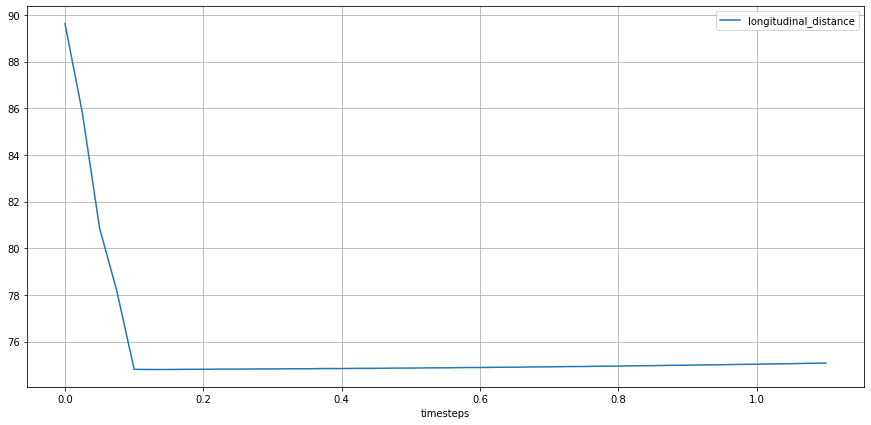

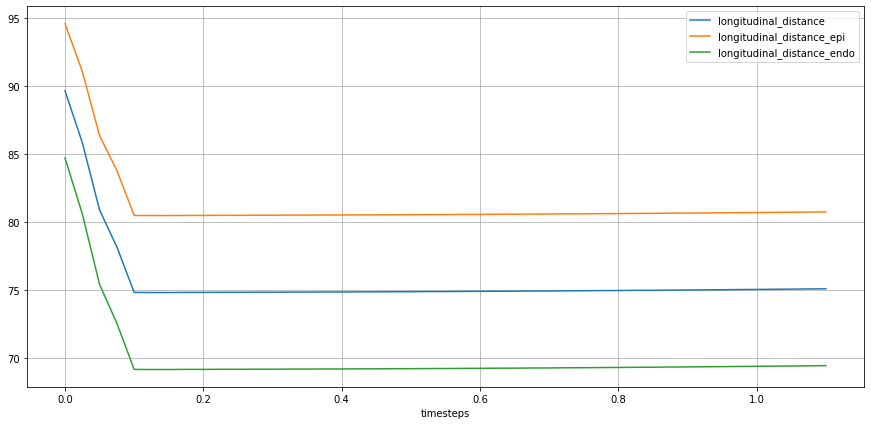

In [7]:
lv.plot_metric(lv.STATES.LONGITUDINAL_DISTANCE, plot_infos=["group"])

In [8]:
lv.plot_longitudinal_line(t=1.1, points_kwargs=dict(point_size=400))

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…

In [9]:
lv.plot_longitudinal_distance(t=0)

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, 1…